# SCGP Example Usage

In [1]:
import numpy as np
import scgp

## 1. Load Raw Data and Construct AnnData/EMObject

In [2]:
region_id = 's255_c001_v001_r001_reg002'
cell_seg_df = scgp.load_cell_coords('data/DKD_Kidney/%s.cell_data.csv' % region_id)
biomarker_expression_df = scgp.load_cell_biomarker_expression('data/DKD_Kidney/%s.expression.csv' % region_id)
print("Cell Segmentation Information:")
display(cell_seg_df)

print("Biomarker Expression Information:")
display(biomarker_expression_df)


Cell Segmentation Information:


,CELL_ID,X,Y
0,1,2032,68
1,2,2254,70
2,3,2117,72
3,4,2271,73
4,5,2306,73
...,...,...,...
5382,5383,2774,3907
5383,5384,2275,3929
5384,5385,2267,3949
5385,5386,2157,4022


Biomarker Expression Information:


,CELL_ID,ACE2,C1QC,C3a,C3aR,C3d,C4d,C5aR,C9,CD107a,...,Nestin,PD1,Perlecan,RORgammaT,SC5b9,SPP1,TFAM,VWF,aSMA,bCatenin1
0,1,30.805000,135.654007,19.826000,22.563999,137.569000,56.346001,80.014999,121.922997,89.472000,...,30.921000,19.167000,43.546001,1370.348999,56.387001,137.897003,193.787003,56.000000,69.309998,161.397003
1,2,40.269001,47.361000,20.306000,35.847000,82.004997,49.630001,81.542000,71.837997,51.536999,...,25.981001,17.079000,35.355999,855.218018,69.125000,70.120003,69.490997,36.980999,64.323997,55.494999
2,3,35.825001,441.257996,30.841999,34.009998,87.501999,55.458000,64.537003,232.764999,158.220001,...,94.227997,27.818001,54.994999,913.262024,45.762001,138.854996,215.020004,92.697998,104.330002,262.372009
3,4,47.768002,131.121994,30.346001,29.153000,115.727997,50.627998,72.580002,123.378998,144.084000,...,25.518999,22.427000,46.750999,679.799011,49.865002,346.490997,422.842010,82.272003,86.486000,194.125000
4,5,35.678001,151.376999,30.433001,31.993999,98.820999,48.361000,75.425003,127.941002,116.136002,...,21.379000,23.566999,36.446999,826.604004,47.521000,179.130005,424.204010,78.441002,80.954002,271.742004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382,5383,38.431999,221.151001,30.618000,27.554001,184.339996,67.431000,97.393997,198.863007,128.565994,...,141.488007,29.497999,69.444000,1739.791992,64.491997,145.285995,174.197006,74.232002,137.979004,258.569000
5383,5384,49.853001,208.341003,24.157000,28.249001,209.576004,96.622002,120.456001,212.839005,79.788002,...,106.438004,30.645000,76.180000,1840.598999,70.843002,171.069000,121.945000,85.535004,55.737000,69.249001
5384,5385,43.928001,317.072998,32.410999,28.566999,177.438004,66.698997,121.791000,305.877014,89.333000,...,93.961998,23.896000,54.918999,1562.654053,72.736000,202.423996,116.978996,74.596001,74.157997,176.748001
5385,5386,49.674000,48.768002,22.464001,25.833000,80.569000,54.247002,113.912003,94.181999,35.297001,...,18.462000,22.386999,44.132000,67.291000,69.725998,68.954002,57.096001,39.244999,40.112999,42.414001


In [3]:
regions = [
    's255_c001_v001_r001_reg002',
    's255_c001_v001_r001_reg016',
]
objs = []
for region_id in regions:
    cell_seg_df = scgp.load_cell_coords('data/DKD_Kidney/%s.cell_data.csv' % region_id)
    biomarker_expression_df = scgp.load_cell_biomarker_expression('data/DKD_Kidney/%s.expression.csv' % region_id)
    obj = scgp.construct_object(
        region_id, cell_seg_df, biomarker_expression_df,
        index_col='CELL_ID', mode='emobject')  # mode can be 'emobject' or 'anndata', both will work for the following steps
    objs.append(obj)

## 2. Run SCGP and Visualize

In [4]:
scgp_partitions, (features, model) = scgp.SCGP_wrapper(
    objs, verbose=True, rp=3e-4, feature_knn=5)

Use 46720 spatial edges and 55143 feature edges
Find 7 partitions
Featurization takes 18.95s, Clustering takes 2.03s


<Figure size 640x480 with 0 Axes>

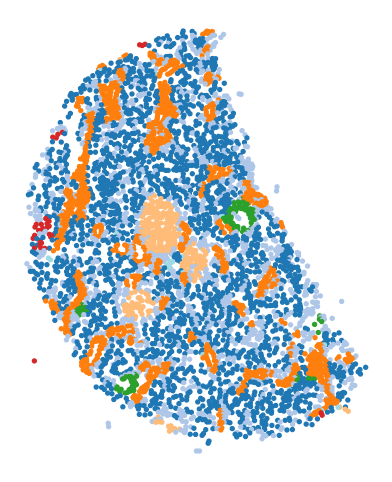

<Figure size 640x480 with 0 Axes>

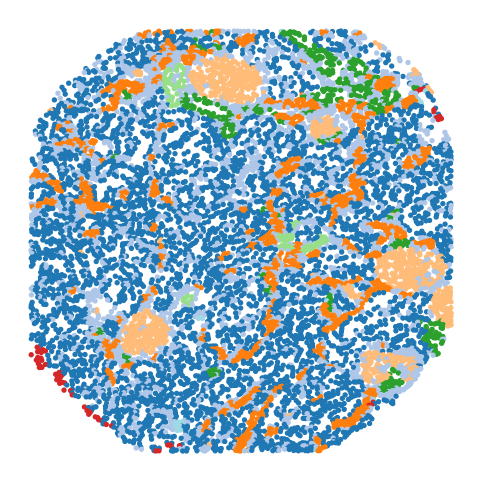

In [5]:
scgp.plot_all_regions_with_annotations(scgp_partitions, objs, figsize=6)

<Figure size 640x480 with 0 Axes>

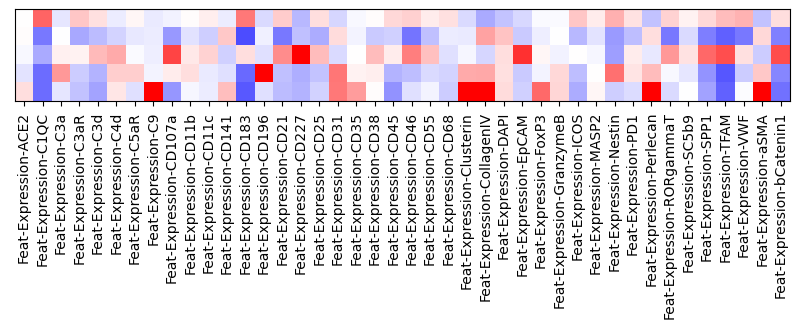

<Figure size 640x480 with 0 Axes>

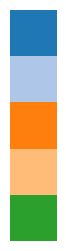

In [6]:
heatmap = scgp.plot_heatmap(scgp_partitions, objs, use_clusters=[0, 1, 2, 3, 4])

## 3. Run SCGP-Extension and Visualize

In [7]:
query_regions = [
    's255_c001_v001_r001_reg010',
    's255_c001_v001_r001_reg015',
]
query_objs = []
for region_id in query_regions:
    cell_seg_df = scgp.load_cell_coords('data/DKD_Kidney/%s.cell_data.csv' % region_id)
    biomarker_expression_df = scgp.load_cell_biomarker_expression('data/DKD_Kidney/%s.expression.csv' % region_id)
    obj = scgp.construct_object(
        region_id, cell_seg_df, biomarker_expression_df,
        index_col='CELL_ID', mode='emobject')  # mode can be 'emobject' or 'anndata', both will work for the following steps
    query_objs.append(obj)

In [8]:
ref_dfs = scgp.make_pseudo_nodes(objs, scgp_partitions, use_partitions=[0, 1, 2, 3, 4], k=200, intra_knn=40)

In [9]:
scgpext_partitions, _ = scgp.SCGPExtension_wrapper(
    query_objs, ref_dfs, verbose=True, rp=3e-4)

Use 43237 spatial edges, 26136 feature edges, 22629 query-reference feature edges
Find 5 partitions
Featurization takes 4.06s, Clustering takes 4.14s


<Figure size 640x480 with 0 Axes>

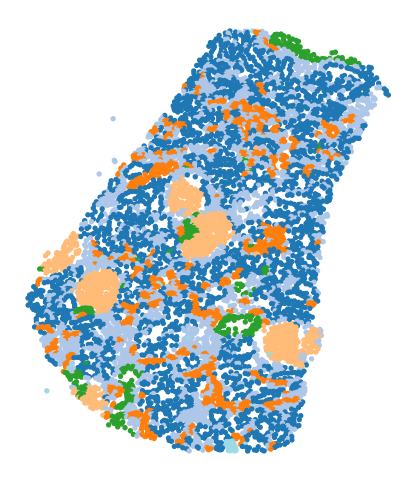

<Figure size 640x480 with 0 Axes>

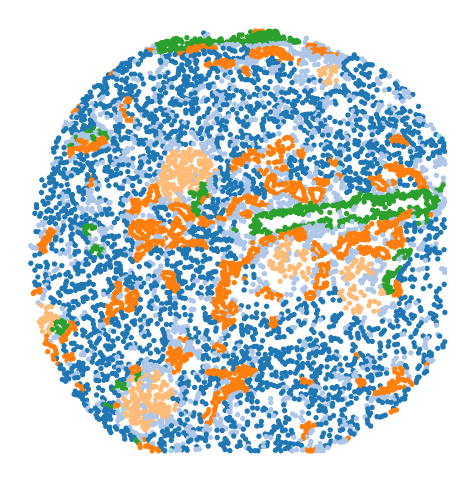

In [11]:
scgp.plot_all_regions_with_annotations(scgpext_partitions, query_objs, figsize=6)